# Preparation

In [1]:
import tensorflow as tf
import os
import random
import cv2
import numpy as np

image_dimensions = (256, 256)
version_name = 'v1'
data_subfolder_name = '../../data'
training_presets_subfolder_name = '256_full_unbalanced'

2024-04-09 23:38:34.469443: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 23:38:34.469805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 23:38:34.499703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-09 23:38:34.566012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 23:38:35.494668: W tensorflow/compiler/tf2

### Optional: Clear Working Memory

In [35]:
%reset -f

# Information on the dataset

- in general, there are 6 categories:
  - anchor(0)   - "long"
  - bolt(1)     - "long"
  - nut(2)      - "stubby"
  - screw(3)    - "long"
  - washer(4)   - "stubby"
  - other(5)    - "variable"

- the minimum amount of samples is in category #6, so we will adjust to it so we have an equal amount of samples in each category for now
- the training set will be 70% of the data, the validation and test will each be 15%
  - this way we use 8855 samples, which is only 52.18% of the dataset

### Info

In [2]:
def count_files_in_folder(folder_path):
    file_count = 0
    
    for item in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, item)):
            file_count += 1
    
    return file_count

folder_path = f'{data_subfolder_name}/0'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/1'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/2'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/3'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/4'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

folder_path = f'{data_subfolder_name}/5'  
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)

Number of files in the folder: 1676
Number of files in the folder: 6077
Number of files in the folder: 1860
Number of files in the folder: 4079
Number of files in the folder: 1802
Number of files in the folder: 1476


### Optional: Load and Create the Dataset

In [28]:
import datumaro as dm

dataset = dm.Dataset.import_from('../../../fastener_dataset/annotations/instances_default.json', format='coco')
#stats = compute_ann_statistics(dataset)
#print(dataset)

# dataset_iter = iter(dataset)
dataset_list = list(dataset)

data = { }
 
for i in range(0, 16970):
    print('processing image... ', i)
    item = dataset_list[i]
    item_annotation = item.annotations[0]
    
    new_path = item.media.path.replace(':', '_')
    # item_img = cv2.imread(new_path)
    # item_img = cv2.cvtColor(item_img, cv2.COLOR_BGR2RGB)
    # res = cv2.resize(item_img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    
    item_category = str(item_annotation.as_dict()['attributes']['category'])
    # print('annotation: ', item_category)
    
    # images.append(res)
    # labels.append(item_label)
    
    if(data.get(item_category) == None):
        data[item_category] = []
    data[item_category].append(new_path)

/home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


processing image...  0
processing image...  1
processing image...  2
processing image...  3
processing image...  4
processing image...  5
processing image...  6
processing image...  7
processing image...  8
processing image...  9
processing image...  10
processing image...  11
processing image...  12
processing image...  13
processing image...  14
processing image...  15
processing image...  16
processing image...  17
processing image...  18
processing image...  19
processing image...  20
processing image...  21
processing image...  22
processing image...  23
processing image...  24
processing image...  25
processing image...  26
processing image...  27
processing image...  28
processing image...  29
processing image...  30
processing image...  31
processing image...  32
processing image...  33
processing image...  34
processing image...  35
processing image...  36
processing image...  37
processing image...  38
processing image...  39
processing image...  40
processing image...  41
pr

In [31]:
print(data.keys())

dict_keys(['667', '626', '595', '581', '533', '491', '475', '441', '433', '427', '414', '403', '351', '348', '298', '290', '281', '278', '272', '250', '249', '223', '217', '211', '207', '183', '178', '177', '172', '168', '591', '534', '495', '492', '469', '380', '370', '305', '304', '302', '301', '300', '256', '253', '243', '242', '201', '193', '155', '144', '139', '132', '130', '126', '125', '119', '118', '115', '109', '108', '107', '106', '103', '668', '666', '665', '664', '663', '575', '538', '486', '483', '465', '460', '398', '397', '352', '329', '246', '245', '237', '233', '231', '224', '216', '215', '214', '213', '212', '209', '196', '195', '194', '142', '452', '381', '324', '323', '3221', '322', '317', '316', '3155', '315', '314', '3106', '310', '624', '421', '419', '413', '411', '405', '295', '294', '293', '270', '269', '268', '267', '265', '264', '262', '261', '260', '259', '258', '547', '392', '369', '368', '358', '357', '346', '335', '333', '232', '220', '190', '189', '147',

In [29]:
# Min samples for category: 12, Max samples for category: 582


def create_dataset_slice():
    train_data = []
    validation_data = []
    test_data = []
    
    count = 0
    for category in data.keys():
        print(f'processing category {category} with {len(data[category])} images...')
        random.shuffle(data[category])
        
        train_end = int(0.7 * len(data[category]))
        val_end = int(0.85 * len(data[category]))
        
        for image_path in data[category][:train_end]:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            resized = cv2.resize(image, dsize=image_dimensions, interpolation=cv2.INTER_CUBIC)
            
            train_data.append((resized, category))
        for image_path in data[category][train_end:val_end]:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            resized = cv2.resize(image, dsize=image_dimensions, interpolation=cv2.INTER_CUBIC)
            
            validation_data.append((resized, category))
        for image_path in data[category][val_end:]:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            resized = cv2.resize(image, dsize=image_dimensions, interpolation=cv2.INTER_CUBIC)
            
            test_data.append((resized, category))
    
        count += 1
        print('\t', count, ' / ', len(data.keys()))
    
    random.shuffle(train_data)
    random.shuffle(validation_data)
    random.shuffle(test_data)
    
    return train_data, validation_data, test_data


train_set, validation_set, test_set = create_dataset_slice()
print('Done!')

# (train_images, train_labels) = zip(*train_set)
# (validation_images, validation_labels) = zip(*validation_set)
# (test_images, test_labels) = zip(*test_set)

# train_images = np.array(train_images)
# train_labels = np.array(train_labels)
# validation_images = np.array(validation_images)
# validation_labels = np.array(validation_labels)
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

processing category...  667  with  72  images
	 1  /  142
processing category...  626  with  48  images
	 2  /  142
processing category...  595  with  12  images
	 3  /  142
processing category...  581  with  61  images
	 4  /  142
processing category...  533  with  120  images
	 5  /  142
processing category...  491  with  84  images
	 6  /  142
processing category...  475  with  24  images
	 7  /  142
processing category...  441  with  25  images
	 8  /  142
processing category...  433  with  36  images
	 9  /  142
processing category...  427  with  12  images
	 10  /  142
processing category...  414  with  24  images
	 11  /  142
processing category...  403  with  24  images
	 12  /  142
processing category...  351  with  60  images
	 13  /  142
processing category...  348  with  24  images
	 14  /  142
processing category...  298  with  48  images
	 15  /  142
processing category...  290  with  72  images
	 16  /  142
processing category...  281  with  36  images
	 17  /  142
proce

### Optional: Save Training Data

- Optionally, we can save our training, test and validation data into a file to load for later
- Saved in training_presets/filename.pkl

In [30]:
import pickle

training_set_file_path = f"./training_presets/{training_presets_subfolder_name}/training_set_{version_name}.pkl"
validation_set_file_path = f"./training_presets/{training_presets_subfolder_name}/validation_set_{version_name}.pkl"
test_set_file_path = f"./training_presets/{training_presets_subfolder_name}/test_set_{version_name}.pkl"

with open(training_set_file_path, "wb") as file:
    print('Saving training set...')
    pickle.dump(train_set, file)
    print('Done!')

with open(validation_set_file_path, "wb") as file:
    print('Saving validation set...')
    pickle.dump(validation_set, file)
    print('Done!')

with open(test_set_file_path, "wb") as file:
    print('Saving test set...')
    pickle.dump(test_set, file)
    print('Done!')

Saving training set...
Done!
Saving validation set...
Done!
Saving test set...
Done!


### Optional: Load Training Data

- Optionally, we can load our training, test and validation data from a file we previously created
- Saved in training_presets/filename.pkl

In [2]:
import pickle

training_set_file_path = f"./training_presets/{training_presets_subfolder_name}/training_set_{version_name}.pkl"
validation_set_file_path = f"./training_presets/{training_presets_subfolder_name}/validation_set_{version_name}.pkl"
test_set_file_path = f"./training_presets/{training_presets_subfolder_name}/test_set_{version_name}.pkl"

with open(training_set_file_path, "rb") as file:
  print('Loading training set...')
  train_set = pickle.load(file)
  print('Done!')
  
with open(validation_set_file_path, "rb") as file:
  print('Loading validation set...')
  validation_set = pickle.load(file)
  print('Done!')
  
with open(test_set_file_path, "rb") as file:
  print('Loading test set...')
  test_set = pickle.load(file)
  print('Done!')

Loading training set...
Done!
Loading validation set...
Done!
Loading test set...
Done!


# Create dataset from loaded data

In [3]:
from sklearn.preprocessing import LabelEncoder

all_labels = [label for _, label in train_set] + [label for _, label in validation_set] + [label for _, label in test_set]

label_encoder = LabelEncoder()

label_encoder.fit(all_labels)

train_set_encoded = [(image, label_encoder.transform([label])[0]) for image, label in train_set]

validation_set_encoded = [(image, label_encoder.transform([label])[0]) for image, label in validation_set]

test_set_encoded = [(image, label_encoder.transform([label])[0]) for image, label in test_set]

print(len(train_set))
print(len(train_set_encoded))

del train_set, validation_set, test_set

11809
11809


In [32]:
print(test_set_encoded[1])
# print(test_set[1])

(array([[[108, 115, 131],
        [113, 120, 138],
        [111, 118, 134],
        ...,
        [112, 125, 142],
        [111, 124, 141],
        [113, 126, 143]],

       [[108, 115, 131],
        [112, 119, 135],
        [119, 121, 134],
        ...,
        [111, 124, 141],
        [115, 128, 145],
        [113, 124, 142]],

       [[113, 120, 136],
        [114, 120, 136],
        [118, 118, 122],
        ...,
        [111, 124, 141],
        [110, 123, 140],
        [111, 122, 140]],

       ...,

       [[ 55,  75, 100],
        [ 56,  76, 101],
        [ 53,  75,  99],
        ...,
        [ 95, 112, 131],
        [ 88, 105, 127],
        [ 87, 104, 124]],

       [[244, 230, 183],
        [234, 220, 192],
        [ 35,  50,  72],
        ...,
        [ 91, 108, 130],
        [ 92, 109, 132],
        [ 85, 102, 122]],

       [[ 61,  72,  97],
        [ 72,  78,  91],
        [141, 129, 106],
        ...,
        [ 93, 110, 130],
        [ 89, 107, 129],
        [ 90, 108, 128]

In [4]:
(train_images, train_labels) = zip(*train_set_encoded)
(validation_images, validation_labels) = zip(*validation_set_encoded)
(test_images, test_labels) = zip(*test_set_encoded)

del train_set_encoded, validation_set_encoded, test_set_encoded

train_images = np.array(train_images)
train_labels = np.array([int(label) for label in train_labels])
validation_images = np.array(validation_images)
validation_labels = np.array([int(label) for label in validation_labels])
test_images = np.array(test_images)
test_labels = np.array([int(label) for label in test_labels])

### Optional: View Data

- Optionally, we can preview our training, test and validation data as images

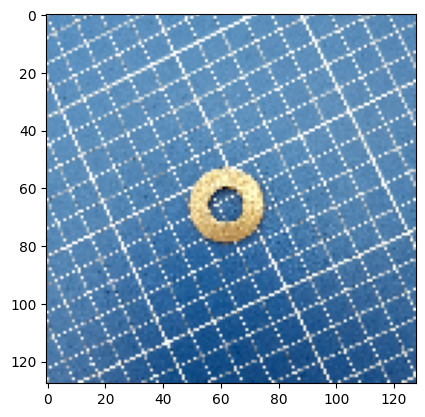

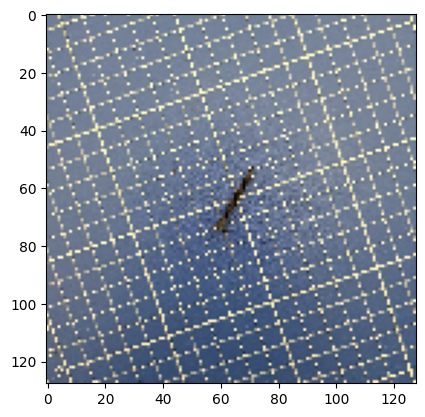

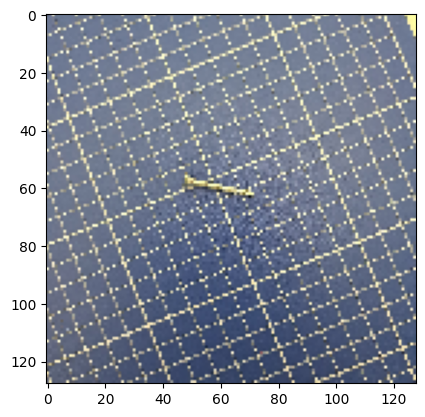

In [5]:
import matplotlib.pyplot as plt

# print(train_images[random.randint(0, len(train_images))])

plt.imshow(train_images[random.randint(0, len(train_images))]); plt.show()
plt.imshow(validation_images[random.randint(0, len(validation_images))]); plt.show()
plt.imshow(test_images[random.randint(0, len(test_images))]); plt.show()

# Create TF Dataset

In [6]:
batch_size = 16

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
del train_images, train_labels

: 

In [7]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)).batch(batch_size)
del validation_images, validation_labels

2024-04-09 22:14:57.451757: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125632512 exceeds 10% of free system memory.
2024-04-09 22:14:57.545179: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125632512 exceeds 10% of free system memory.


In [8]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)
del test_images, test_labels

2024-04-09 22:14:58.804888: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128040960 exceeds 10% of free system memory.


In [ ]:
# for data_batch, labels_batch in train_dataset:
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)
    
# for data_batch, labels_batch in train_dataset:
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)
    
# for data_batch, labels_batch in train_dataset:
#     print("data batch shape:", data_batch.shape)
#     print("labels batch shape:", labels_batch.shape)

# Define Convolutional Neural Network Architecture

In [9]:
import keras
from keras import layers
import gc

gc.collect() 
keras.backend.clear_session()

In [14]:
inputs = keras.Input(shape=(image_dimensions[0], image_dimensions[1], 3))
x = layers.Rescaling(1./255)(inputs)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
    ]
)

x = data_augmentation(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)  
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x) # 256
x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

# x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
# x = layers.BatchNormalization()(x)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)  

outputs = layers.Dense(142, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                      

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer=keras.optimizers.Adam(),
            metrics=["accuracy"])

# Optional: Use fine-tuned model

In [20]:
import tensorflow.keras as keras
from tensorflow.keras import layers
import gc

gc.collect() 
keras.backend.clear_session()

In [21]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(image_dimensions[0], image_dimensions[1],3)
)
conv_base.trainable = False

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.3),
    ]
)

inputs = keras.Input(shape=(image_dimensions[0], image_dimensions[1], 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(142, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f'fastener_net_142_pretrained.h5',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(train_dataset,
                    epochs=25,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/25


369/370 [============================>.] - ETA: 0s - loss: 52.0625 - accuracy: 0.1522

/home/luka/Work/anaconda3/envs/dataenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


370/370 [==============================] - 43s 112ms/step - loss: 52.0650 - accuracy: 0.1522 - val_loss: 48.8877 - val_accuracy: 0.2324
Epoch 2/25
370/370 [==============================] - 41s 111ms/step - loss: 38.9261 - accuracy: 0.2262 - val_loss: 33.3731 - val_accuracy: 0.3056
Epoch 3/25
370/370 [==============================] - 42s 112ms/step - loss: 29.2617 - accuracy: 0.2634 - val_loss: 26.2361 - val_accuracy: 0.3443
Epoch 4/25
370/370 [==============================] - 42s 114ms/step - loss: 23.0797 - accuracy: 0.2818 - val_loss: 25.6343 - val_accuracy: 0.3142
Epoch 5/25
370/370 [==============================] - 43s 115ms/step - loss: 19.4341 - accuracy: 0.2910 - val_loss: 23.1026 - val_accuracy: 0.3232
Epoch 6/25
370/370 [==============================] - 42s 115ms/step - loss: 17.3330 - accuracy: 0.2972 - val_loss: 20.4077 - val_accuracy: 0.3345
Epoch 7/25
370/370 [==============================] - 42s 114ms/step - loss: 16.1752 - accuracy: 0.3000 - val_loss: 19.3189 - val

In [24]:
print(len(model.trainable_weights))

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False
  
print(len(model.trainable_weights))

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f'fastener_net_142_fine_tuned.h5',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

10
10
Epoch 1/50
 21/370 [>.............................] - ETA: 34s - loss: 17.8833 - accuracy: 0.3601

KeyboardInterrupt: 

# Training

- Train on the data and view training results using matplotlib 

In [16]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f'fastener_net_142_{version_name}.keras',
        save_best_only=True,
        monitor='val_loss')
]

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/100


370/370 [==============================] - 22s 51ms/step - loss: 3.4854 - accuracy: 0.1794 - val_loss: 5.3266 - val_accuracy: 0.0493
Epoch 2/100
370/370 [==============================] - 17s 46ms/step - loss: 2.3953 - accuracy: 0.3211 - val_loss: 3.1482 - val_accuracy: 0.2281
Epoch 3/100
370/370 [==============================] - 17s 45ms/step - loss: 2.0059 - accuracy: 0.3904 - val_loss: 3.3736 - val_accuracy: 0.2077
Epoch 4/100
370/370 [==============================] - 17s 45ms/step - loss: 1.7726 - accuracy: 0.4385 - val_loss: 4.2544 - val_accuracy: 0.1757
Epoch 5/100
370/370 [==============================] - 17s 47ms/step - loss: 1.6210 - accuracy: 0.4797 - val_loss: 3.0972 - val_accuracy: 0.2602
Epoch 6/100
370/370 [==============================] - 17s 46ms/step - loss: 1.5239 - accuracy: 0.4999 - val_loss: 4.7252 - val_accuracy: 0.2015
Epoch 7/100
370/370 [==============================] - 17s 46ms/step - loss: 1.4325 - accuracy: 0.5316 - val_loss: 2.5443 - val_accuracy: 0.36

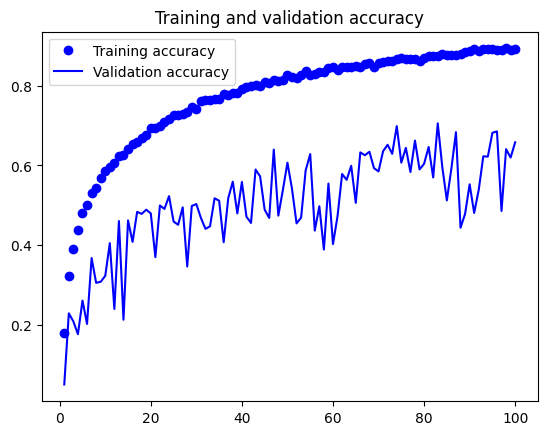

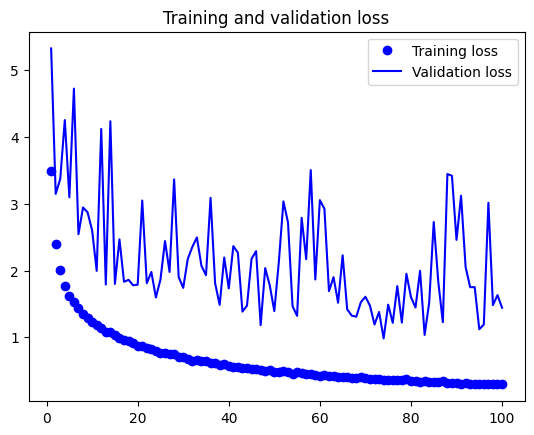

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.savefig(f'./model_results/accuracy_history_{version_name}.png')
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.savefig(f'./model_results/loss_history_{version_name}.png')
plt.show()

# Testing

- Test the performance of the model on the test data 

In [18]:
test_model = keras.models.load_model(f"fastener_net_142_{version_name}.keras")
evaluation_results = test_model.evaluate(test_dataset)
print(f"Test accuracy: {evaluation_results[1]:.3f}")

82/82 [==============================] - 2s 17ms/step - loss: 0.9918 - accuracy: 0.7033
Test accuracy: 0.703


In [39]:
import datumaro as dm

dataset = dm.Dataset.import_from('../../../fastener_dataset/annotations/instances_default.json', format='coco')
#stats = compute_ann_statistics(dataset)
#print(dataset)

# dataset_iter = iter(dataset)
dataset_list = list(dataset)

classes = {
}
 
for i in range(0, 16970):
    print('processing image... ', i)
    item = dataset_list[i]
    item_annotation = item.annotations[0]
    
    item_category = item_annotation.as_dict()['attributes']['category']
    item_class = item_annotation.as_dict()['label']
    
    if(classes.get(item_category) == None):
      classes[item_category] = []
    classes[item_category].append(item_class)
    
for c, l in classes.items():
  classes[c] = list(set(l))
  
print(classes)

processing image...  0
processing image...  1
processing image...  2
processing image...  3
processing image...  4
processing image...  5
processing image...  6
processing image...  7
processing image...  8
processing image...  9
processing image...  10
processing image...  11
processing image...  12
processing image...  13
processing image...  14
processing image...  15
processing image...  16
processing image...  17
processing image...  18
processing image...  19
processing image...  20
processing image...  21
processing image...  22
processing image...  23
processing image...  24
processing image...  25
processing image...  26
processing image...  27
processing image...  28
processing image...  29
processing image...  30
processing image...  31
processing image...  32
processing image...  33
processing image...  34
processing image...  35
processing image...  36
processing image...  37
processing image...  38
processing image...  39
processing image...  40
processing image...  41
pr

In [40]:
pred = test_model.predict(test_dataset)
pred_labels = np.argmax(pred, axis=1)

test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

test_labels = label_encoder.inverse_transform(test_labels)
pred_labels = label_encoder.inverse_transform(pred_labels)

print(test_labels)
print(pred_labels)

count = 0
count_between = 0
count_inside = 0

for i in range(0, len(test_labels)):
  if test_labels[i] != pred_labels[i]:
    # print(f"Real label: {test_labels[i]}, Predicted label: {pred_labels[i]}")
    if(classes[pred_labels[i]] != classes[test_labels[i]]):
      # print("Missed between categories")
      count_between += 1
    else:
      # print("Missed inside categories")
      count_inside += 1
    count += 1
    
print(f"Errors between classes: {count_between}, {count_between/count*100:.2f}% of total errors")
print(f"Errors inside classes: {count_inside}, {count_inside/count*100:.2f}% of total errors")
print(f"Total errors: {count} out of {len(test_labels)}")

82/82 [==============================] - 1s 9ms/step
['256' '405' '130' ... '333' '262' '581']
['256' '405' '469' ... '333' '262' '581']
Errors between meta-categories: 151, 19.53% of total errors
Errors inside meta-categories: 622, 80.47% of total errors
Total errors: 773 out of 2605
